In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8) 
pd.options.mode.chained_assignment = None 

#Read in Data 
df = pd.read_csv('movies.csv')

In [22]:
df.head() #Look through first 10 row in the data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release country,Year_Release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,United States),1980


In [5]:
for col in df.columns: #Check for any Null value in the Data
    Missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,Missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#Fill null value with 0 and No Data
df[['rating','runtime','score','votes','budget','gross']] = df[['rating','runtime','score','votes','budget','gross']].fillna(value=0)
df[['company','writer','star','votes','country']] = df[['company','writer','star','votes','country']].fillna(value='No Data')
df['released'] = df['released'].fillna(datetime(2021,1,1))

In [7]:
for col in df.columns: #Recheck for any null value
    Missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,Missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [8]:
df.dtypes #Check Data Type

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
#Change data type
df[['votes','budget','gross','runtime']] = df[['votes','budget','gross','runtime']].astype(int)

In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release country,Year_Release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,United States),1980


In [25]:
#Seperate Date into a new column and arrange the format
df[['released_date','release country']] = df['released'].str.split('(',expand=True)
df['released_date'] = pd.to_datetime(df['released_date'])
df['Year_Release'] = df['released_date'].astype('str').str[:4]
df['gross'] = df['gross'].map(lambda x: abs(x))
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release country,Year_Release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980-06-13,United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980-07-02,United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980-06-20,United States),1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980-07-02,United States),1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980-07-25,United States),1980


In [26]:
#Sorted Data to the most Gross revenue
df.sort_values('gross',ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release country,Year_Release
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2147483648,Twentieth Century Fox,194,1997-12-19,United States),1997
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2147483648,Marvel Studios,181,2019-04-26,United States),2019
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2147483648,Twentieth Century Fox,162,2009-12-18,United States),2009
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015-12-18,United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018-04-27,United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990-01-26,United States),1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989-04-14,United States),1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989-04-07,United States),1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990-01-13,Japan),1990


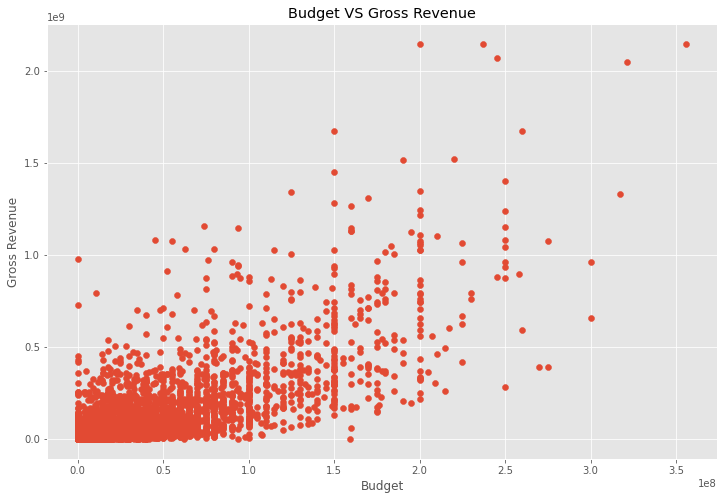

In [13]:
#Plot out Budget and Gross Revenue to see any colation
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget VS Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

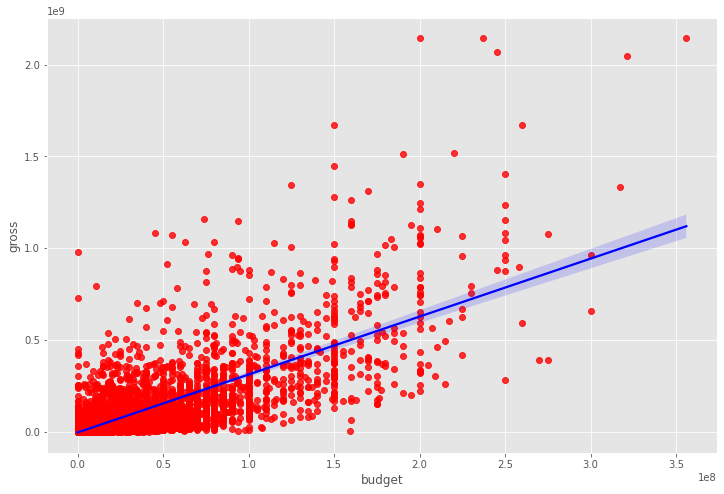

In [27]:
#Plot using seaborn with added blue line for better visualization
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [28]:
#Find correlation in all numeric value
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.264977,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.187157,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.637045,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.754893,0.268372
gross,0.264977,0.187157,0.637045,0.754893,1.000000,0.244496
runtime,0.116358,0.394564,0.306984,0.268372,0.244496,1.000000


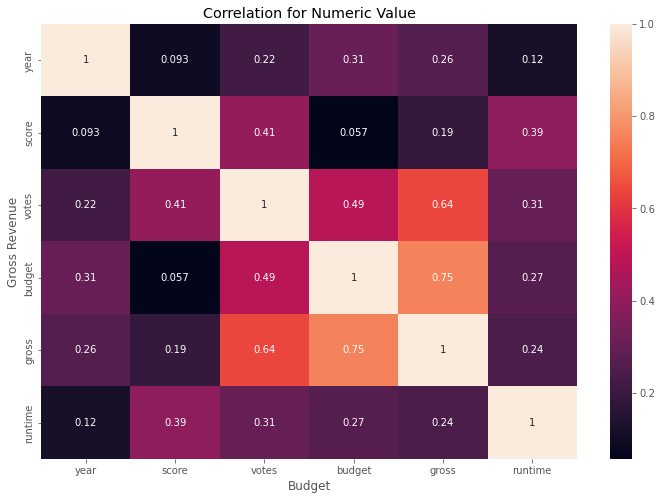

In [29]:
#Plot using heatmap for a better understanding of correlation
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation for Numeric Value')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

In [17]:
#Numerize the object data to find correlation
df_numerize = df.copy()
for col in df_numerize.columns:
    if (df_numerize[col].dtype == 'object'):
        df_numerize[col] = df_numerize[col].astype('category')
        df_numerize[col] = df_numerize[col].cat.codes

df_numerize

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release country,Year_Release
0,6587,7,6,1980,1706,8.4,927000,2589,4015,1047,55,19000000,46998772,2320,146,1980-06-13,56,0
1,5573,7,1,1980,1493,5.8,65000,2269,1632,327,56,4500000,58853106,731,104,1980-07-02,56,0
2,5142,5,0,1980,1772,8.7,1200000,1111,2567,1745,56,18000000,538375067,1540,124,1980-06-20,56,0
3,286,5,4,1980,1493,7.7,221000,1301,2000,2247,56,3500000,83453539,1813,88,1980-07-02,56,0
4,1027,7,4,1980,1544,7.3,108000,1054,521,410,56,6000000,39846344,1778,98,1980-07-25,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2965,3.1,18,1500,2289,2422,56,7000,0,1734,90,2020-10-23,56,40
7664,1678,0,4,2020,1108,4.7,36,774,2614,1886,56,0,0,539,90,2020-02-07,56,40
7665,4717,0,6,2020,194,5.7,29,2061,2683,2041,56,58750,0,941,0,2020-04-27,8,40
7666,2843,0,6,2020,2818,0.0,0,1184,1824,450,56,15000,0,1734,120,2020-10-01,56,40


In [30]:
#Find correlation with all data type and sort any high correlation
sortedcor = df_numerize.corr().unstack()
sortedcor.sort_values()
high_corr = sortedcor[sortedcor > 0.5].sort_values()
high_corr

gross            votes              0.637045
votes            gross              0.637045
gross            budget             0.754893
budget           gross              0.754893
year             Year_Release       0.997295
Year_Release     year               0.997295
name             name               1.000000
release country  release country    1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
country          country            1.000000
Year_Relea

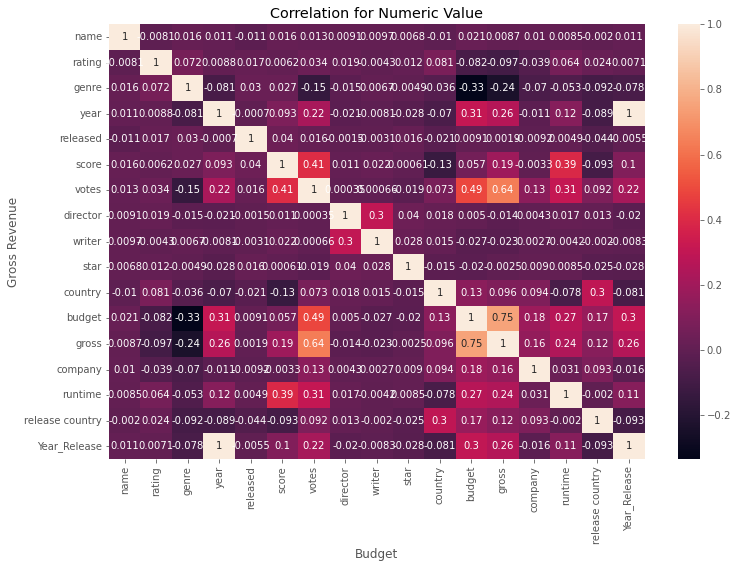

In [31]:
#Plot using Heat map
correlation_matrix = df_numerize.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation for Numeric Value')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

In [32]:
#Summary there is a strong correlation between 
# 1.Votes and Gross Revenue
# 2.Budget and Gross Revenue